In [1]:
# Import required libraries for Customer Segmentation / Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [2]:
# Load the merged data from the file
merged_data = pd.read_csv('merged_data.csv')


# Aggregate transaction data
customer_data = merged_data.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()


In [3]:
# Normalize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalValue', 'Quantity']])


In [4]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)


In [5]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.72127971818163


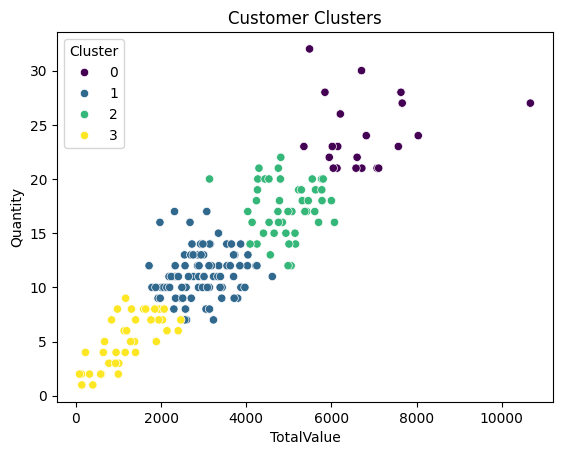

In [6]:
# Visualize clusters
sns.scatterplot(data=customer_data, x='TotalValue', y='Quantity', hue='Cluster', palette='viridis')
plt.title('Customer Clusters')
plt.show()
